<a href="https://colab.research.google.com/github/DebBidhi/Top_Stock_Picker/blob/main/StockSelecet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas

In [ ]:
def get_nifty500_symbols():
    return [
        "360ONE.NS", "3MINDIA.NS", "ABB.NS", "ACC.NS", "AIAENG.NS", "APLAPOLLO.NS",
        "AUBANK.NS", "AARTIIND.NS", "AAVAS.NS", "ABBOTINDIA.NS", "ACE.NS", "ADANIENSOL.NS",
        "ADANIENT.NS", "ADANIGREEN.NS", "ADANIPORTS.NS", "ADANIPOWER.NS", "ATGL.NS",
        "AWL.NS", "ABCAPITAL.NS", "ABFRL.NS", "AEGISLOG.NS", "AETHER.NS", "AFFLE.NS",
        "AJANTPHARM.NS", "APLLTD.NS", "ALKEM.NS", "ALKYLAMINE.NS", "ALLCARGO.NS", "AMBER.NS", "AMBUJACEM.NS", "ANANDRATHI.NS",
        "ANGELONE.NS", "ANURAS.NS", "APARINDS.NS", "APOLLOHOSP.NS", "APOLLOTYRE.NS",
        "APTUS.NS", "ACI.NS", "ASAHIINDIA.NS", "ASHOKLEY.NS", "ASIANPAINT.NS",
        "ASTERDM.NS", "ASTRAZEN.NS", "ASTRAL.NS", "ATUL.NS", "AUROPHARMA.NS",
        "AVANTIFEED.NS", "DMART.NS", "AXISBANK.NS", "BEML.NS", "BLS.NS", "BSE.NS",
        "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS", "BAJAJHLDNG.NS", "BALAMINES.NS",
        "BALKRISIND.NS", "BALRAMCHIN.NS", "BANDHANBNK.NS", "BANKBARODA.NS", "BANKINDIA.NS",
        "MAHABANK.NS", "BATAINDIA.NS", "BAYERCROP.NS", "BERGEPAINT.NS", "BDL.NS", "BEL.NS",
        "BHARATFORG.NS", "BHEL.NS", "BPCL.NS", "BHARTIARTL.NS", "BIKAJI.NS", "BIOCON.NS",
        "BIRLACORPN.NS", "BSOFT.NS", "BLUEDART.NS", "BLUESTARCO.NS", "BBTC.NS",
        "BORORENEW.NS", "BOSCHLTD.NS", "BRIGADE.NS", "BRITANNIA.NS", "MAPMYINDIA.NS",
        "CCL.NS", "CESC.NS", "CGPOWER.NS", "CIEINDIA.NS", "CRISIL.NS", "CSBBANK.NS",
        "CAMPUS.NS", "CANFINHOME.NS", "CANBK.NS", "CAPLIPOINT.NS", "CGCL.NS", "CARBORUNIV.NS",
        "CASTROLIND.NS", "CEATLTD.NS", "CELLO.NS", "CENTRALBK.NS", "CDSL.NS", "CENTURYPLY.NS",
        "CENTURYTEX.NS", "CERA.NS", "CHALET.NS", "CHAMBLFERT.NS", "CHEMPLASTS.NS",
        "CHENNPETRO.NS", "CHOLAHLDNG.NS", "CHOLAFIN.NS", "CIPLA.NS", "CUB.NS", "CLEAN.NS",
        "COALINDIA.NS", "COCHINSHIP.NS", "COFORGE.NS", "COLPAL.NS", "CAMS.NS",
        "CONCORDBIO.NS", "CONCOR.NS", "COROMANDEL.NS", "CRAFTSMAN.NS", "CREDITACC.NS",
        "CROMPTON.NS", "CUMMINSIND.NS", "CYIENT.NS", "DCMSHRIRAM.NS", "DLF.NS",
        "DOMS.NS", "DABUR.NS", "DALBHARAT.NS", "DATAPATTNS.NS", "DEEPAKFERT.NS",
        "DEEPAKNTR.NS", "DELHIVERY.NS", "DEVYANI.NS", "DHANUKA.NS", "DBL.NS", "DIXON.NS",
        "DMART.NS", "DIVISLAB.NS", "DRREDDY.NS", "EIDPARRY.NS", "EIHOTEL.NS",
        "ELGIEQUIP.NS", "EMAMILTD.NS", "ENDURANCE.NS", "EPL.NS", "EQUITASBNK.NS",
        "ERIS.NS", "ESCORTS.NS", "EXIDEIND.NS", "FDC.NS", "FEDERALBNK.NS", "FINEORG.NS",
        "FLUOROCHEM.NS", "FORTIS.NS", "GRASIM.NS", "GUJGASLTD.NS", "GODREJCP.NS",
        "GODREJPROP.NS", "HCLTECH.NS", "HDFCBANK.NS", "HINDALCO.NS",
        "HINDCOPPER.NS", "HINDZINC.NS", "HMT.NS", "HPL.NS", "ICICIBANK.NS", "ICICIGI.NS",
        "ITC.NS", "IOC.NS", "IRB.NS", "JINDALSTEL.NS", "JSWSTEEL.NS", "KOTAKBANK.NS",
        "LT.NS", "LICI.NS", "M&M.NS", "MARUTI.NS", "MRF.NS", "NTPC.NS", "NESTLEIND.NS",
        "ONGC.NS", "PIDILITIND.NS", "PNB.NS", "POWERGRID.NS", "RELIANCE.NS", "SBIN.NS",
        "SHREECEM.NS", "SUNPHARMA.NS", "TATACHEM.NS", "TATACONSUM.NS", "TATAMOTORS.NS",
        "TATASTEEL.NS", "TCS.NS", "TECHM.NS", "ULTRACEMCO.NS", "VEDL.NS", "WIPRO.NS", "ZYDUSLIFE.NS", "ECLERX.NS", "ZEEL.NS"
    ]

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import time

#its make alot of api call so it take alittle time Do not Run this function twice its pirpise is to store all the stocks details in memory
class StockDataCache:
    def __init__(self):
        self.cache = {}

    def fetch_and_store_data(self, symbols, days=365):
        end_date = datetime.now()
        start_date = end_date - timedelta(days=days)

        for symbol in symbols:
            if symbol not in self.cache:
                try:
                    stock = yf.Ticker(symbol)
                    history = stock.history(start=start_date, end=end_date)
                    info = stock.info
                    self.cache[symbol] = {
                        'history': history,
                        'info': info
                    }
                    #print(f"\rFetching data: {symbol}", end="", flush=True)
                    # Create a progress bar animation
                    progress = (symbols.index(symbol) + 1) / len(symbols)
                    bar_length = 20
                    filled_length = int(bar_length * progress)
                    bar = '█' * filled_length + '-' * (bar_length - filled_length)
                    percent = progress * 100
                    print(f"\rProgress: |{bar}| {percent:.1f}% Complete", end="", flush=True)
                    time.sleep(0.1)  # Small delay to make the progress visible

                except Exception as e:
                    print(f"Error fetching data for {symbol}: {e}")
            else:
                print(f"Data for {symbol} already in cache")

    def get_stock_data(self, symbol):
        return self.cache.get(symbol)

    def get_all_symbols(self):
        return list(self.cache.keys())

# Function to initialize and populate the cache
def initialize_stock_cache():
    cache = StockDataCache()
    symbols = get_nifty500_symbols()
    cache.fetch_and_store_data(symbols)
    return cache

# # Usage example(do not uncomment)
# stock_cache = initialize_stock_cache()

# # Example of how to use the cache
# symbol = "RELIANCE.NS"
# stock_data = stock_cache.get_stock_data(symbol)
# if stock_data:
#     print(f"\nStock data for {symbol}:")
#     print("History Head:")
#     print(stock_data['history'].head())
#     print("\nSome Info:")
#     print(f"Market Cap: {stock_data['info'].get('marketCap')}")
#     print(f"P/E Ratio: {stock_data['info'].get('trailingPE')}")
# else:
#     print(f"No data found for {symbol}")

# Example of getting all available symbols
# all_symbols = stock_cache.get_all_symbols()
# print(f"\nAll available symbols: {all_symbols}")

Progress: |█████████████-------| 68.5% CompleteData for DMART.NS already in cache
Progress: |████████████████████| 100.0% Complete
Stock data for RELIANCE.NS:
History Head:
                                  Open         High          Low        Close  \
Date                                                                            
2023-09-26 00:00:00+05:30  2330.639826  2342.250322  2327.699853  2334.576416   
2023-09-27 00:00:00+05:30  2335.573219  2363.777544  2330.590131  2360.887207   
2023-09-28 00:00:00+05:30  2374.939578  2374.939578  2317.135761  2326.205078   
2023-09-29 00:00:00+05:30  2333.878988  2361.086695  2326.205081  2337.068115   
2023-10-03 00:00:00+05:30  2322.068973  2327.700009  2308.166208  2310.308838   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-09-26 00:00:00+05:30  5043891        0.0           0.0  
2023-09-27 00:00:00+05:30  5861389        0.0           0.0  
2023-09-28 

Top Stocks Within +/- 10% of 52-Week Lows:


,symbol,current_price,yearly_low,yearly_high,percentage_from_high,percentage_from_low
5,ZEEL.NS,₹127.31,125.500000,299.700012,57.520857,1.442229
0,ANURAS.NS,₹741.70,719.693444,1105.214975,32.890883,3.057770
1,CSBBANK.NS,₹322.20,307.649994,422.250000,23.694491,4.729406
3,CREDITACC.NS,₹1215.25,1153.000000,1781.870505,31.799197,5.398959
2,CGCL.NS,₹204.80,191.065482,820.272529,75.032688,7.188384
4,SHREECEM.NS,₹25911.65,23653.312466,30622.645655,15.384024,9.547660



Normalized Price Comparison (1 Year):


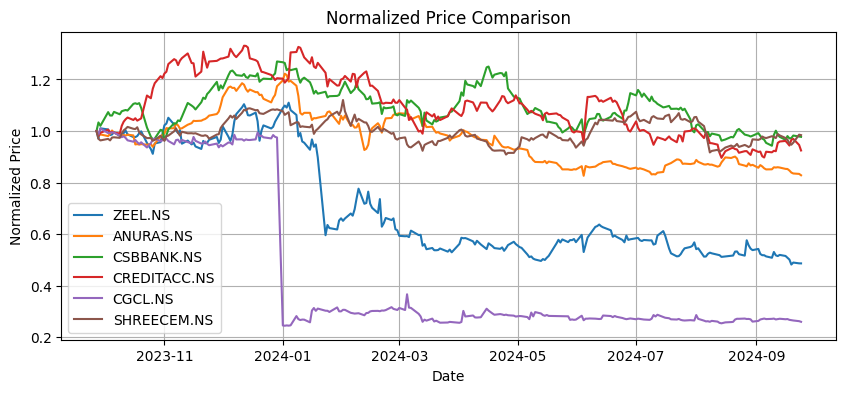


Normalized Price Comparison (5 Years):


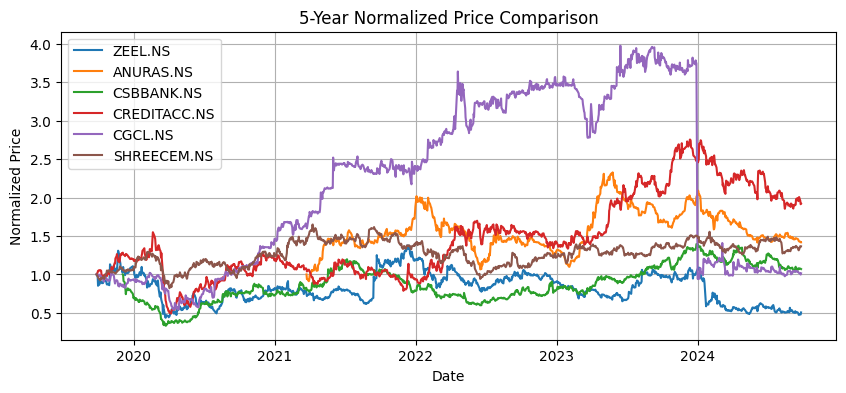




Zee Entertainment Enterprises Limited
groww link:
https://groww.in/stocks/zee-entertainment-enterprises-ltd

Stock Analysis Charts:


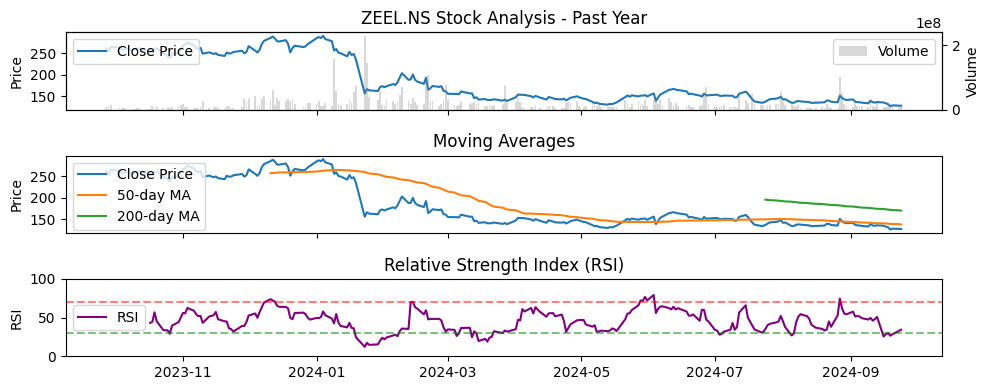




Anupam Rasayan India Ltd
groww link:
https://groww.in/stocks/anupam-rasayan-india-ltd

Stock Analysis Charts:


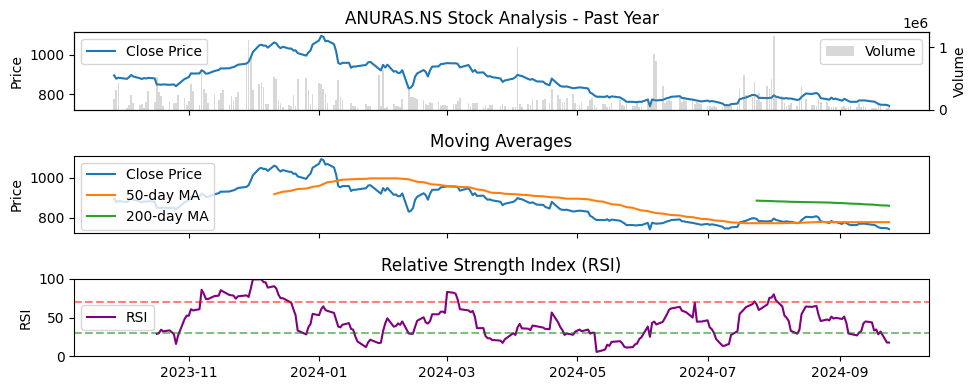




CSB Bank Limited
groww link:
https://groww.in/stocks/csb-bank-ltd

Stock Analysis Charts:


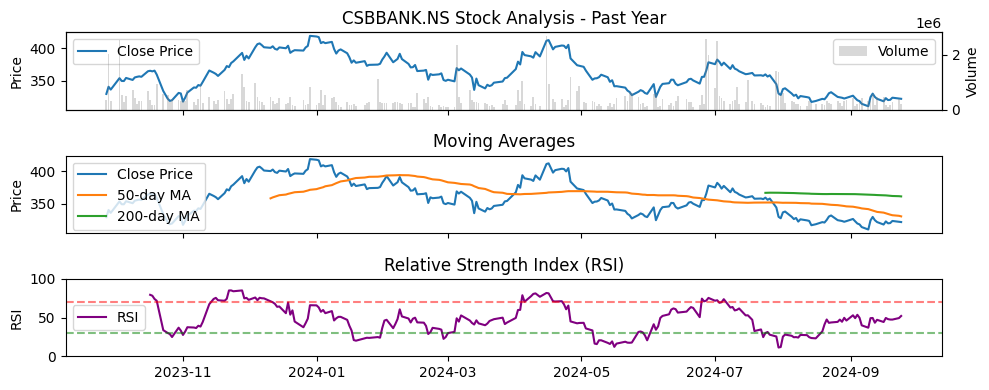




CreditAccess Grameen Limited
groww link:
https://groww.in/stocks/creditaccess-grameen-ltd

Stock Analysis Charts:


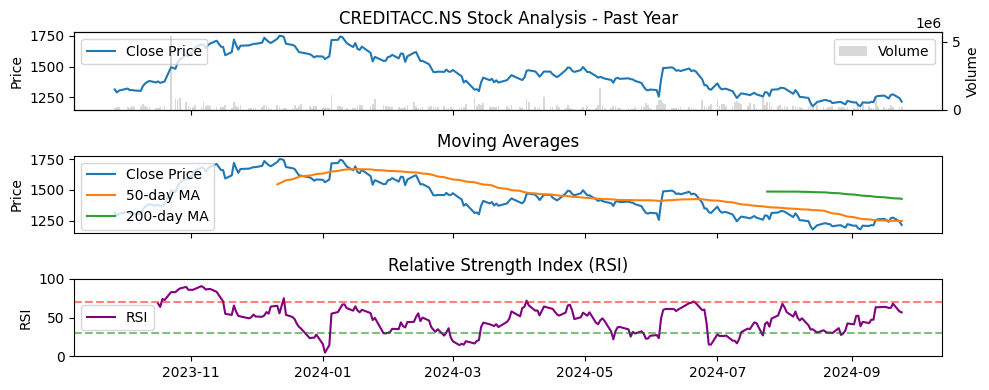




Capri Global Capital Limited
groww link:
https://groww.in/stocks/capri-global-capital-ltd

Stock Analysis Charts:


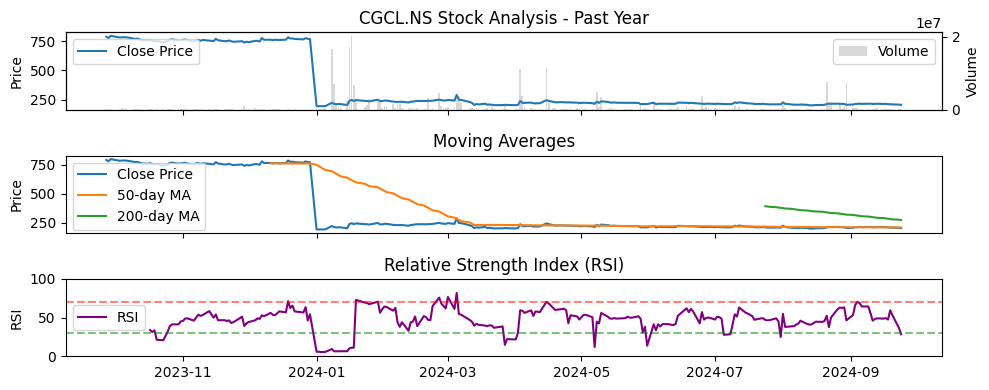




Shree Cement Limited
groww link:
https://groww.in/stocks/shree-cement-ltd

Stock Analysis Charts:


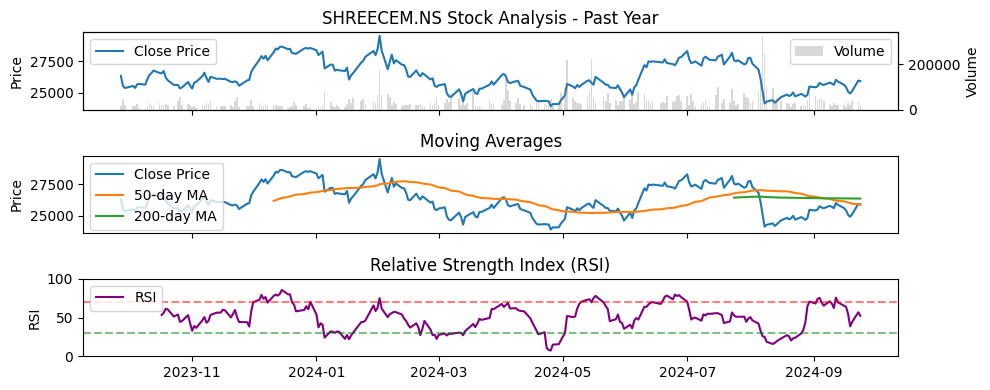

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import yfinance as yf

# 1. The underdog stratagy
def get_stock_data(symbol, days=365):
    stock_data = stock_cache.get_stock_data(symbol)
    if stock_data is None:
        raise ValueError(f"No data found for {symbol}")

    end_date = datetime.now().replace(tzinfo=None)
    start_date = end_date - timedelta(days=days)
    history = stock_data['history']

    # Ensure the index is timezone-naive
    history.index = history.index.tz_localize(None)

    history = history.loc[start_date:end_date]
    return stock_data['info'], history

def display_stock_data(data, title):
    styled_df = data.style \
        .format({
            'current_price': '₹{:.2f}',
            'pe_ratio': '{:.2f}',
            'price_to_book': '{:.2f}',
            'dividend_yield': '{:.2f}%',
            'one_year_return': '{:.2f}%',
            'peg_ratio': '{:.2f}',
            'return_on_equity': '{:.2f}%'
        }) \
        .background_gradient(cmap='PuBuGn') \
        .set_caption(title)

    display(styled_df)

def get_top_n_yearly_lows(n, symbols):
    results = []
    for symbol in symbols:
        try:
            info, history = get_stock_data(symbol)
            if not history.empty:
                current_price = history['Close'].iloc[-1]
                yearly_low = history['Low'].min()
                yearly_high = history['High'].max()

                # Check if the current price is within +/- 10% of the yearly low
                if abs(current_price - yearly_low) / yearly_low <= 0.10:
                    percentage_from_high = ((yearly_high - current_price) / yearly_high) * 100
                    percentage_from_low = ((current_price - yearly_low) / yearly_low) * 100
                    results.append({
                        'symbol': symbol,
                        'current_price': current_price,
                        'yearly_low': yearly_low,
                        'yearly_high': yearly_high,
                        'percentage_from_high': percentage_from_high,
                        'percentage_from_low': percentage_from_low,
                        'info': info,
                        'history': history
                    })
        except Exception as e:
            print(f"Error processing data for {symbol}: {e}")

    if not results:
        print("No stocks found within +/- 10% of their yearly lows.")
        return pd.DataFrame()

    results_df = pd.DataFrame(results)
    return results_df.sort_values('percentage_from_low', ascending=True).head(n)

def get_financial_metrics(info):
    metrics = {
        'Market Cap': info.get('marketCap'),
        'P/E Ratio': info.get('trailingPE'),
        'EPS': info.get('trailingEps'),
        'Dividend Yield': info.get('dividendYield'),
        'Beta': info.get('beta'),
        '52 Week High': info.get('fiftyTwoWeekHigh'),
        '52 Week Low': info.get('fiftyTwoWeekLow'),
        'Avg Volume': info.get('averageVolume'),
    }
    return {k: v for k, v in metrics.items() if v is not None}

def plot_stock_charts(history, symbol):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 4), sharex=True)

    # Price and Volume Chart
    ax1.plot(history.index, history['Close'], label='Close Price')
    ax1.set_ylabel('Price')
    ax1.set_title(f"{symbol} Stock Analysis - Past Year")
    ax1.legend(loc='upper left')

    ax1_volume = ax1.twinx()
    ax1_volume.bar(history.index, history['Volume'], alpha=0.3, color='gray', label='Volume')
    ax1_volume.set_ylabel('Volume')
    ax1_volume.legend(loc='upper right')

    # Moving Averages
    ax2.plot(history.index, history['Close'], label='Close Price')
    ax2.plot(history.index, history['Close'].rolling(window=50).mean(), label='50-day MA')
    ax2.plot(history.index, history['Close'].rolling(window=200).mean(), label='200-day MA')
    ax2.set_ylabel('Price')
    ax2.set_title('Moving Averages')
    ax2.legend()

    # Relative Strength Index (RSI)
    delta = history['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    ax3.plot(history.index, rsi, label='RSI', color='purple')
    ax3.axhline(y=70, color='red', linestyle='--', alpha=0.5)
    ax3.axhline(y=30, color='green', linestyle='--', alpha=0.5)
    ax3.set_ylabel('RSI')
    ax3.set_title('Relative Strength Index (RSI)')
    ax3.set_ylim(0, 100)
    ax3.legend()

    plt.tight_layout()
    plt.show()

def plot_comparison_chart(top_stocks):
    plt.figure(figsize=(10, 4))
    for _, row in top_stocks.iterrows():
        plt.plot(row['history'].index, row['history']['Close'] / row['history']['Close'].iloc[0], label=row['symbol'])

    plt.title("Normalized Price Comparison")
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.grid(True)

    plt.show()

def get_five_year_data(symbol):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=5*365)

    stock = yf.Ticker(symbol)
    history = stock.history(start=start_date, end=end_date)

    return history

def plot_five_year_chart(top_stocks):
  #if len of top stcoks bigger than 12 then pass
    if len(top_stocks) < 12:

      plt.figure(figsize=(10, 4))

      for _, row in top_stocks.iterrows():
          symbol = row['symbol']
          five_year_data = get_five_year_data(symbol)
          plt.plot(five_year_data.index, five_year_data['Close'] / five_year_data['Close'].iloc[0], label=symbol)

      plt.title("5-Year Normalized Price Comparison")
      plt.xlabel("Date")
      plt.ylabel("Normalized Price")
      plt.legend()
      plt.grid(True)

      plt.show()

def analyze_top_stocks(n=5):
    symbols = stock_cache.get_all_symbols()
    top_stocks = get_top_n_yearly_lows(n, symbols)
    print("Top Stocks Within +/- 10% of 52-Week Lows:")
    display_stock_data(top_stocks[['symbol', 'current_price', 'yearly_low', 'yearly_high', 'percentage_from_high', 'percentage_from_low']], "Top Stocks Within +/- 10% of 52-Week Lows")

    # Rest of the function remains the same
    print("\nNormalized Price Comparison (1 Year):")
    plot_comparison_chart(top_stocks)

    print("\nNormalized Price Comparison (5 Years):")
    plot_five_year_chart(top_stocks)

    for _, row in top_stocks.iterrows():
        symbol = row['symbol']
        info = row['info']
        history = row['history']
        print("\n\n")
        print(info.get('longName', 'N/A'))
        print("groww link:")
        long_name = info.get('longName', '').lower().replace(' ', '-').replace('limited', 'ltd')
        print(f"https://groww.in/stocks/{long_name}")
        print("\nStock Analysis Charts:")
        plot_stock_charts(history, symbol)

# Run the underdog stratagy
analyze_top_stocks(20)

Top 10 Value Stocks:


,current_price,pe_ratio,price_to_book,dividend_yield
name,,,,
Indian Oil Corporation Limited,₹169.89,7.59,1.28,8.83%
Vedanta Limited,₹470.20,34.47,5.79,9.78%
Bharat Petroleum Corporation Limited,₹339.15,7.60,1.95,6.78%
Chennai Petroleum Corporation Limited,₹921.45,5.43,1.57,5.97%
Coal India Limited,₹504.30,8.23,3.76,5.85%
Hindustan Zinc Limited,₹507.60,26.57,14.22,6.90%
Oil and Natural Gas Corporation Limited,₹299.45,8.44,1.12,4.26%
Bank of Baroda Limited,₹243.60,6.61,0.98,3.12%
Canara Bank,₹109.29,6.30,1.00,2.95%


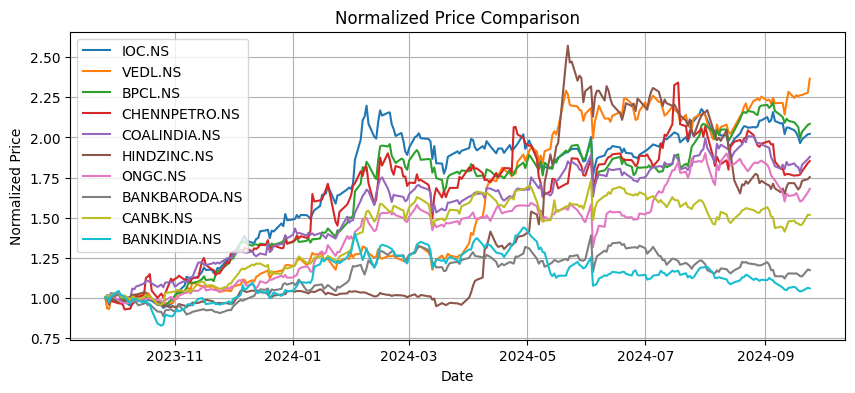


Top 10 Growth Stocks:


,current_price,one_year_return,peg_ratio,return_on_equity
name,,,,
Escorts Kubota Limited,₹4349.30,31.58%,-64.70,nan%
Cochin Shipyard Limited,₹1796.65,234.41%,nan,nan%
BSE Limited,₹3980.15,206.03%,nan,nan%
Vedanta Limited,₹470.20,153.63%,-5.84,nan%
HPL Electric & Power Limited,₹580.05,166.97%,nan,nan%
Dixon Technologies (India) Limited,₹14340.85,171.43%,2.27,nan%
Aditya Birla Fashion and Retail Limited,₹348.10,61.46%,-24.89,nan%
Aditya Birla Real Estate Limited,₹2772.20,157.60%,nan,nan%
Castrol India Limited,₹249.95,87.63%,nan,0.43%


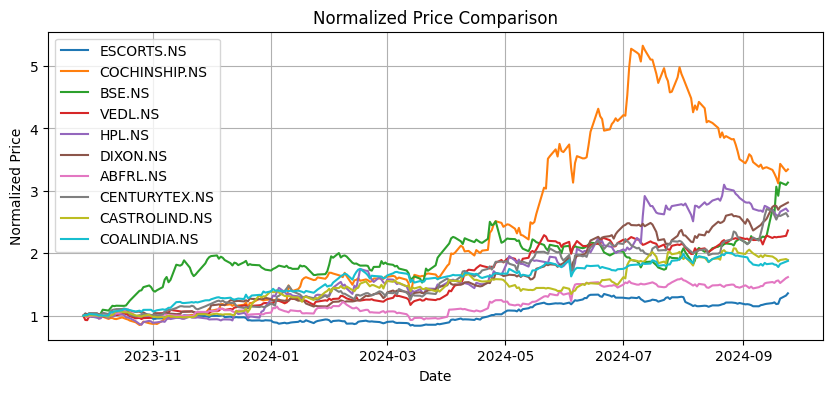


Top 10 Momentum Stocks:


,current_price,one_month_return,six_month_return,one_year_return
name,,,,
BSE Limited,₹3980.15,47.399311,47.684045,206.03%
Cochin Shipyard Limited,₹1796.65,-12.666949,85.773262,234.41%
Dixon Technologies (India) Limited,₹14340.85,8.455285,88.960520,171.43%
Concord Biotech Limited,₹2224.50,39.681638,50.317704,120.42%
Vedanta Limited,₹470.20,5.962621,76.627829,153.63%
Aditya Birla Real Estate Limited,₹2772.20,10.367063,62.369778,157.60%
Bajaj Auto Limited,₹12443.65,18.492904,38.736724,149.25%
Blue Star Limited,₹2026.00,17.326844,59.323256,129.05%
HPL Electric & Power Limited,₹580.05,-10.935954,74.858236,166.97%


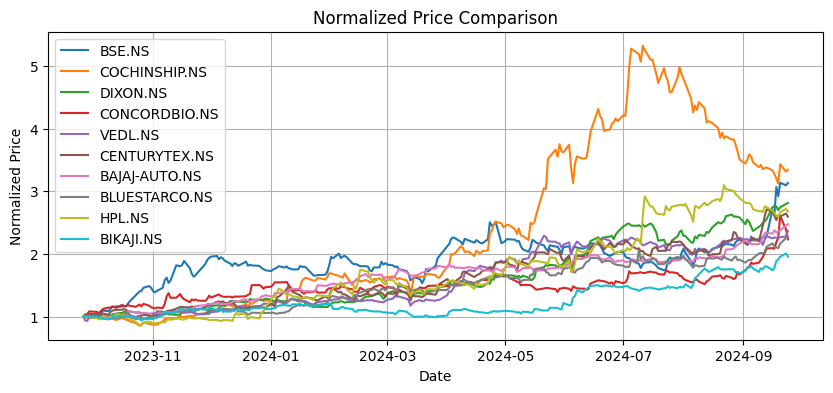


Top 10 Quality Stocks:


,current_price,return_on_equity,profit_margin,debt_to_equity
name,,,,
HMT Limited,₹85.84,nan%,17.107950,nan
Bajaj Holdings & Investment Limited,₹10777.05,nan%,4.283190,0.099000
Tata Consultancy Services Limited,₹4271.30,0.50%,0.192010,9.538000
Castrol India Limited,₹249.95,0.43%,0.171140,3.437000
CRISIL Limited,₹4635.20,0.31%,0.203830,1.999000
Aster DM Healthcare Limited,₹420.90,nan%,1.365330,27.509000
ABB India Limited,₹8078.20,0.27%,0.140260,0.747000
HCL Technologies Limited,₹1775.60,0.25%,0.146050,8.171000
Bank of Maharashtra,₹61.46,0.23%,0.475880,nan


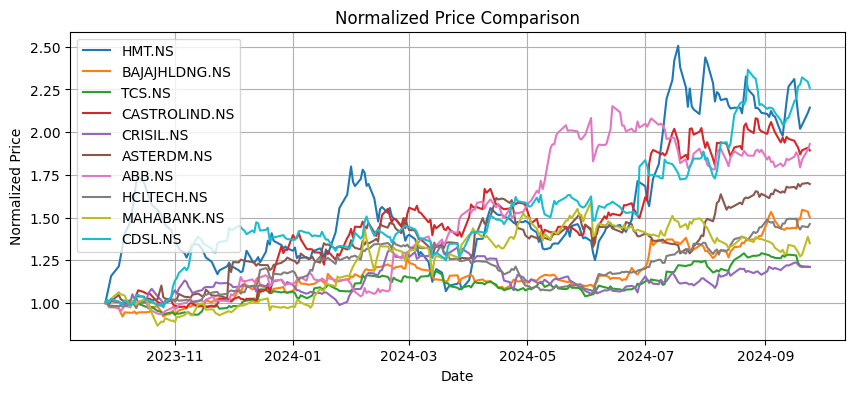


Top 10 Low Volatility Stocks:


,current_price,volatility,beta
name,,,
Britannia Industries Limited,₹6203.15,0.185405,0.539000
Asian Paints Limited,₹3248.40,0.185720,0.323000
ITC Limited,₹515.25,0.185893,0.216000
Sun Pharmaceutical Industries Limited,₹1868.10,0.186226,0.551000
Bata India Limited,₹1429.60,0.192883,0.598000
Nestlé India Limited,₹2696.40,0.194682,0.089000
Dr. Reddy's Laboratories Limited,₹6650.35,0.202231,0.340000
ICICI Bank Limited,₹1318.60,0.202646,0.855000
Tata Consultancy Services Limited,₹4271.30,0.208788,0.553000


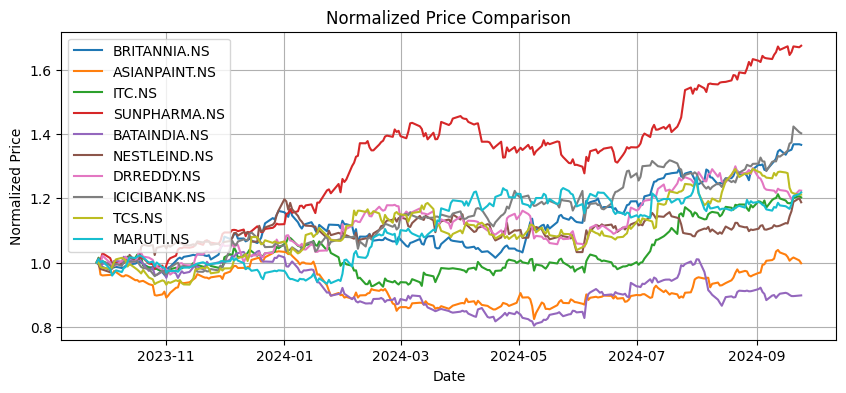


Sector Performance (Average One Year Return):
sector
Real Estate               101.497927
Utilities                  73.243859
Industrials                68.158050
Energy                     66.931042
Healthcare                 61.885087
Technology                 51.275486
Consumer Cyclical          47.504148
Consumer Defensive         45.191064
Financial Services         34.892302
Basic Materials            33.492030
Communication Services     27.873486
Name: one_year_return, dtype: float64

Top 10 Stocks (Combined Strategy):


,current_price,pe_ratio,price_to_book,one_year_return,return_on_equity,volatility
name,,,,,,
Tata Consultancy Services Limited,₹4271.30,33.14,16.77,21.01%,0.50%,0.208788
Bajaj Auto Limited,₹12443.65,43.70,11.95,149.25%,nan%,0.243216
Vedanta Limited,₹470.20,34.47,5.79,153.63%,nan%,0.372576
Castrol India Limited,₹249.95,27.60,11.44,87.63%,0.43%,0.454312
Bharat Petroleum Corporation Limited,₹339.15,7.60,1.95,110.06%,nan%,0.348649
Bosch Limited,₹36703.30,42.85,9.04,93.30%,nan%,0.245127
Sun Pharmaceutical Industries Limited,₹1868.10,43.16,7.05,65.33%,nan%,0.186226
Mahindra & Mahindra Limited,₹3074.30,31.32,5.21,94.87%,nan%,0.299663
Indian Oil Corporation Limited,₹169.89,7.59,1.28,105.78%,nan%,0.368174


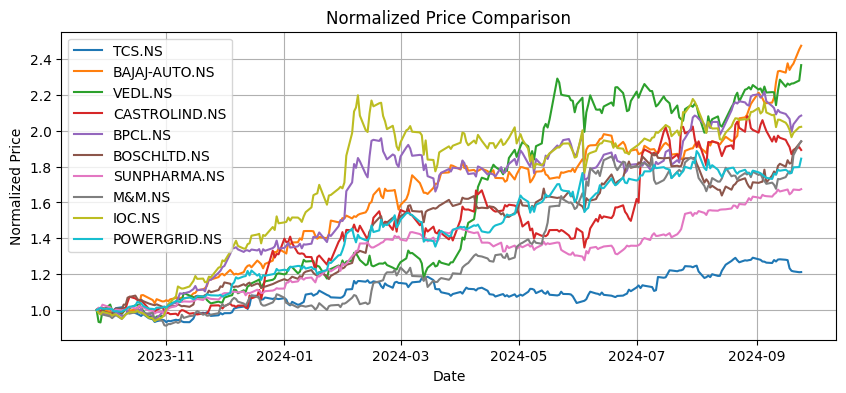


 
 
 Unique Stocks Identified for Analysis:
Total Unique Stocks: 43
*Important Information:

Moving Averages (MA):
 - 50-day MA and 200-day MA are commonly used to analyze trends. 
 - When the 50-day MA crosses above the 200-day MA (Golden Cross), it's a bullish signal (potential buy).
 - When the 50-day MA crosses below the 200-day MA (Death Cross), it's a bearish signal (potential sell).

Relative Strength Index (RSI):
 - RSI measures the speed and change of price movements, ranging between 0 and 100.
 - An RSI above 70 is considered overbought (potential sell).
 - An RSI below 30 is considered oversold (potential buy).
 - Traders often look for divergence between the RSI and stock price as a sign of trend reversal.

Price and Volume:
 - Price trends, shown on the top chart, help identify momentum in stock movements.
 - Volume bars represent trading activity. An increase in volume often confirms the strength of a price move.

Trading Strategy Tips:
 - Moving Averages: When the stock

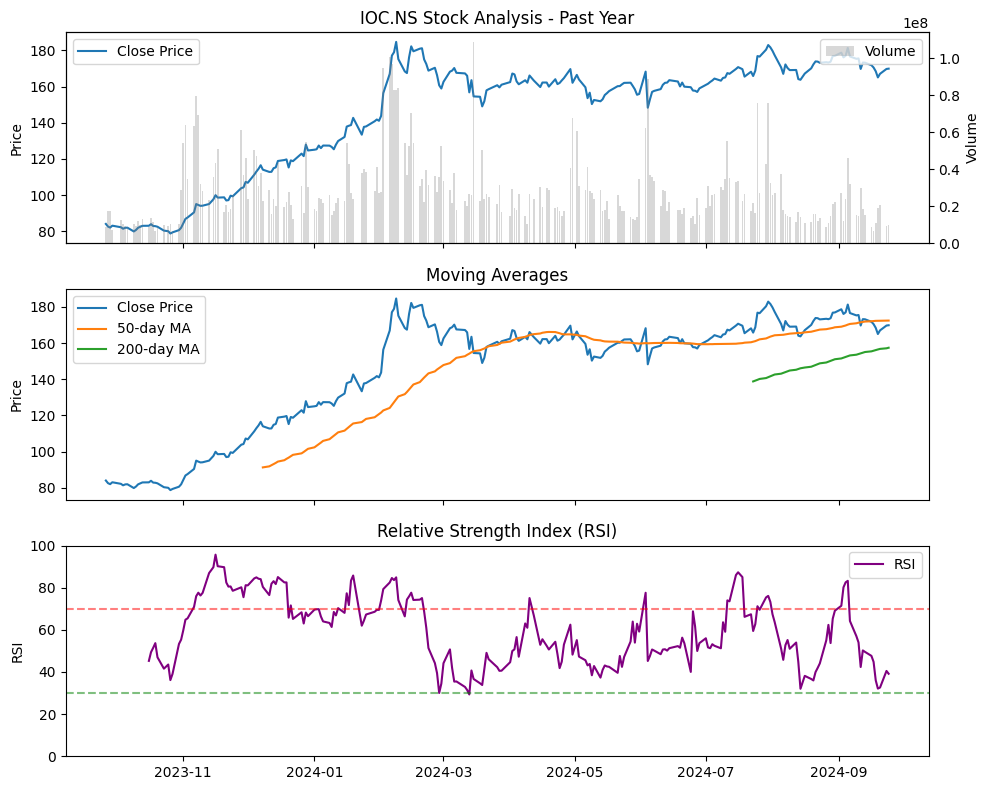


Plotting charts for VEDL.NS:
- This stock is in the Top 10 Value Stocks.
- This stock is in the Top 10 Growth Stocks.
- This stock is in the Top 10 Momentum Stocks.
- This stock is in the Top 10 Combined Strategy Stocks.
vedanta-ltd
Groww link: https://groww.in/stocks/vedanta-ltd
ploting no: 2 of 43


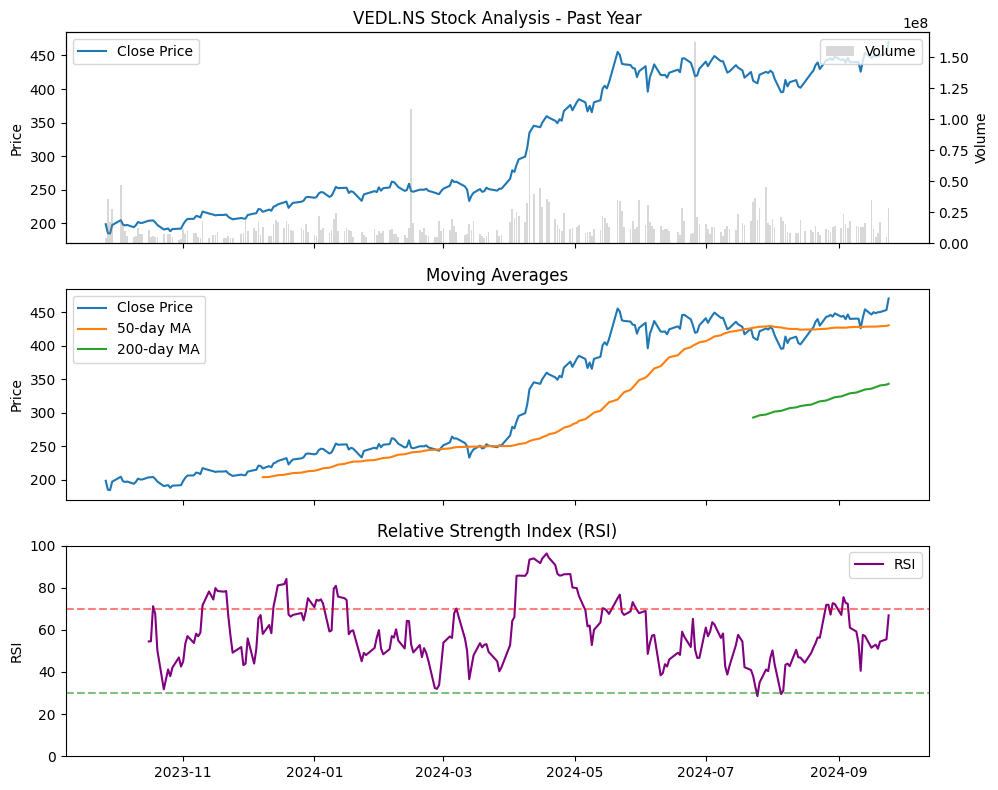


Plotting charts for BPCL.NS:
- This stock is in the Top 10 Value Stocks.
- This stock is in the Top 10 Combined Strategy Stocks.
bharat-petroleum-corporation-ltd
Groww link: https://groww.in/stocks/bharat-petroleum-corporation-ltd
ploting no: 3 of 43


KeyboardInterrupt: 

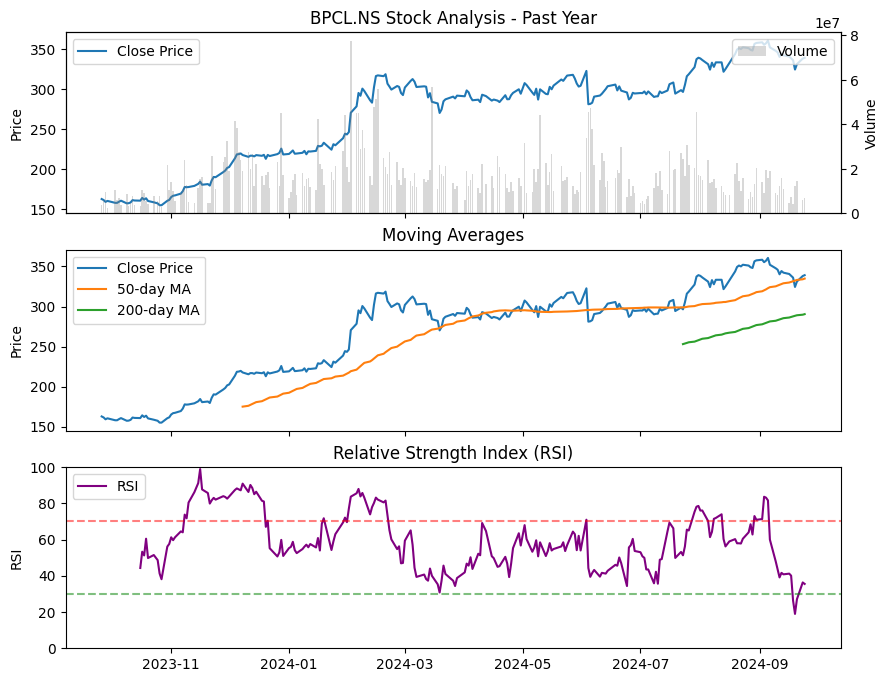

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# 2. The Avarage stratagies
def analyze_stock(symbol, stock_data):
    history = stock_data['history']
    info = stock_data['info']

    # Calculate returns
    current_price = history['Close'].iloc[-1] if not history.empty else None
    one_month_ago = datetime.now() - timedelta(days=30)
    six_months_ago = datetime.now() - timedelta(days=180)
    one_year_ago = datetime.now() - timedelta(days=365)

    month_history = history[history.index >= one_month_ago]
    six_month_history = history[history.index >= six_months_ago]
    year_history = history[history.index >= one_year_ago]

    one_month_return = ((current_price / month_history['Close'].iloc[0] - 1) * 100) if not month_history.empty else None
    six_month_return = ((current_price / six_month_history['Close'].iloc[0] - 1) * 100) if not six_month_history.empty else None
    one_year_return = ((current_price / year_history['Close'].iloc[0] - 1) * 100) if not year_history.empty else None

    # Calculate volatility
    daily_returns = history['Close'].pct_change()
    volatility = daily_returns.std() * np.sqrt(252)  # Annualized volatility

    # Extract key financials and ratios
    market_cap = info.get('marketCap')
    pe_ratio = info.get('trailingPE')
    forward_pe = info.get('forwardPE')
    peg_ratio = info.get('pegRatio')
    price_to_book = info.get('priceToBook')
    dividend_yield = info.get('dividendYield', 0) * 100
    debt_to_equity = info.get('debtToEquity')
    return_on_equity = info.get('returnOnEquity')
    profit_margin = info.get('profitMargins')
    beta = info.get('beta')

    return {
        'symbol': symbol,
        'name': info.get('longName', symbol),  # Use longName if available, otherwise use symbol
        'current_price': current_price,
        'one_month_return': one_month_return,
        'six_month_return': six_month_return,
        'one_year_return': one_year_return,
        'volatility': volatility,
        'market_cap': market_cap,
        'pe_ratio': pe_ratio,
        'forward_pe': forward_pe,
        'peg_ratio': peg_ratio,
        'price_to_book': price_to_book,
        'dividend_yield': dividend_yield,
        'debt_to_equity': debt_to_equity,
        'return_on_equity': return_on_equity,
        'profit_margin': profit_margin,
        'beta': beta
    }

def analyze_all_stocks(stock_cache):
    results = {}
    for symbol in stock_cache.get_all_symbols():
        stock_data = stock_cache.get_stock_data(symbol)
        if stock_data:
            results[symbol] = analyze_stock(symbol, stock_data)
    return results

def calculate_sector_averages(df):
    numeric_df = df.select_dtypes(include=[np.number])
    return numeric_df.groupby(df['sector']).mean()

def calculate_z_scores(df):
    numeric_df = df.select_dtypes(include=[np.number])
    return numeric_df.apply(lambda x: (x - x.mean()) / x.std() if x.std() != 0 else 0)

def rank_stocks(df, metrics, weights):
    z_scores = calculate_z_scores(df)
    weighted_scores = pd.DataFrame()

    for metric, weight in zip(metrics, weights):
        if metric in z_scores.columns:
            weighted_scores[metric] = z_scores[metric] * weight

    return weighted_scores.sum(axis=1).sort_values(ascending=False)

# Analyze all stocks
all_stock_analysis = analyze_all_stocks(stock_cache)
df = pd.DataFrame.from_dict(all_stock_analysis, orient='index')

# Add sector information
df['sector'] = df.index.map(lambda x: stock_cache.get_stock_data(x)['info'].get('sector', 'Unknown'))

# Calculate sector averages
sector_averages = calculate_sector_averages(df)

# Value investing strategy
value_metrics = ['pe_ratio', 'price_to_book', 'dividend_yield']
value_weights = [-0.4, -0.4, 0.2]  # Negative weights for ratios we want to minimize
value_stocks = rank_stocks(df, value_metrics, value_weights).head(10)

# Growth investing strategy
growth_metrics = ['one_year_return', 'peg_ratio', 'return_on_equity']
growth_weights = [0.4, -0.3, 0.3]  # Negative weight for PEG as lower is better
growth_stocks = rank_stocks(df, growth_metrics, growth_weights).head(10)

# Momentum investing strategy
momentum_metrics = ['one_month_return', 'six_month_return', 'one_year_return']
momentum_weights = [0.2, 0.3, 0.5]
momentum_stocks = rank_stocks(df, momentum_metrics, momentum_weights).head(10)

# Quality investing strategy
quality_metrics = ['return_on_equity', 'profit_margin', 'debt_to_equity']
quality_weights = [0.4, 0.4, -0.2]  # Negative weight for debt to equity
quality_stocks = rank_stocks(df, quality_metrics, quality_weights).head(10)

# Low volatility strategy
low_vol_stocks = df.sort_values('volatility').head(10)

def plot_comparison_chart(top_stocks, stock_cache):
    plt.figure(figsize=(10, 4))

    # Plot normalized prices for each stock
    for symbol in top_stocks.index:
        stock_data = stock_cache.get_stock_data(symbol)
        history = stock_data['history']
        if not history.empty:
            plt.plot(history.index, history['Close'] / history['Close'].iloc[0], label=symbol)

    plt.title("Normalized Price Comparison")
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.grid(True)
    plt.show()

def display_stock_data(data, title):
    styled_df = data.style \
        .format({
            'current_price': '₹{:.2f}',
            'pe_ratio': '{:.2f}',
            'price_to_book': '{:.2f}',
            'dividend_yield': '{:.2f}%',
            'one_year_return': '{:.2f}%',
            'peg_ratio': '{:.2f}',
            'return_on_equity': '{:.2f}%'
        }) \
        .background_gradient(cmap='PuBuGn') \
        .set_caption(title)

    display(styled_df)

# Print results
print("Top 10 Value Stocks:")
value_data = df.loc[value_stocks.index].set_index('name')[['current_price', 'pe_ratio', 'price_to_book', 'dividend_yield']]
display_stock_data(value_data, "Top 10 Value Stocks")
plot_comparison_chart(value_stocks, stock_cache)

print("\nTop 10 Growth Stocks:")
growth_data = df.loc[growth_stocks.index].set_index('name')[['current_price', 'one_year_return', 'peg_ratio', 'return_on_equity']]
display_stock_data(growth_data, "Top 10 Growth Stocks")
plot_comparison_chart(growth_stocks, stock_cache)

print("\nTop 10 Momentum Stocks:")
momentun_data = df.loc[momentum_stocks.index].set_index('name')[['current_price', 'one_month_return', 'six_month_return', 'one_year_return']]
display_stock_data(momentun_data, "Top 10 Momentum Stocks")
plot_comparison_chart(momentum_stocks, stock_cache)

print("\nTop 10 Quality Stocks:")
quality_data = df.loc[quality_stocks.index].set_index('name')[['current_price', 'return_on_equity', 'profit_margin', 'debt_to_equity']]
display_stock_data(quality_data, "Top 10 Quality Stocks")
plot_comparison_chart(quality_stocks, stock_cache)

print("\nTop 10 Low Volatility Stocks:")
low_vol_data = low_vol_stocks.set_index('name')[['current_price', 'volatility', 'beta']]
display_stock_data(low_vol_data, "Top 10 Low Volatility Stocks")
plot_comparison_chart(low_vol_stocks, stock_cache)

# Sector analysis
print("\nSector Performance (Average One Year Return):")
print(sector_averages['one_year_return'].sort_values(ascending=False))

# Combined strategy
combined_metrics = ['pe_ratio', 'price_to_book', 'one_year_return', 'return_on_equity', 'volatility']
combined_weights = [-0.2, -0.2, 0.2, 0.2, -0.2]
combined_top_stocks = rank_stocks(df, combined_metrics, combined_weights).head(10)

print("\nTop 10 Stocks (Combined Strategy):")
combined_data = df.loc[combined_top_stocks.index].set_index('name')[['current_price', 'pe_ratio', 'price_to_book', 'one_year_return', 'return_on_equity', 'volatility']]
display_stock_data(combined_data, "Top 10 Stocks (Combined Strategy)")
plot_comparison_chart(combined_top_stocks, stock_cache)

def plot_stock_charts(history, symbol):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 4), sharex=True)

    # Price and Volume Chart
    ax1.plot(history.index, history['Close'], label='Close Price')
    ax1.set_ylabel('Price')
    ax1.set_title(f"{symbol} Stock Analysis - Past Year")
    ax1.legend(loc='upper left')

    ax1_volume = ax1.twinx()
    ax1_volume.bar(history.index, history['Volume'], alpha=0.3, color='gray', label='Volume')
    ax1_volume.set_ylabel('Volume')
    ax1_volume.legend(loc='upper right')

    # Moving Averages
    ax2.plot(history.index, history['Close'], label='Close Price')
    ax2.plot(history.index, history['Close'].rolling(window=50).mean(), label='50-day MA')
    ax2.plot(history.index, history['Close'].rolling(window=200).mean(), label='200-day MA')
    ax2.set_ylabel('Price')
    ax2.set_title('Moving Averages')
    ax2.legend()

    # Relative Strength Index (RSI)
    delta = history['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    ax3.plot(history.index, rsi, label='RSI', color='purple')
    ax3.axhline(y=70, color='red', linestyle='--', alpha=0.5)
    ax3.axhline(y=30, color='green', linestyle='--', alpha=0.5)
    ax3.set_ylabel('RSI')
    ax3.set_title('Relative Strength Index (RSI)')
    ax3.set_ylim(0, 100)
    ax3.legend()

    plt.tight_layout()
    plt.show()


# Step 1: Analyze all stocks and create DataFrame
all_stock_analysis = analyze_all_stocks(stock_cache)
df = pd.DataFrame.from_dict(all_stock_analysis, orient='index')

# Add sector information
df['sector'] = df.index.map(lambda x: stock_cache.get_stock_data(x)['info'].get('sector', 'Unknown'))

# Step 2: Calculate sector averages
sector_averages = calculate_sector_averages(df)

# Step 3: Ranking stocks based on different strategies
# Value investing strategy
value_metrics = ['pe_ratio', 'price_to_book', 'dividend_yield']
value_weights = [-0.4, -0.4, 0.2]  # Negative weights for ratios we want to minimize
value_stocks = rank_stocks(df, value_metrics, value_weights).head(10)

# Growth investing strategy
growth_metrics = ['one_year_return', 'peg_ratio', 'return_on_equity']
growth_weights = [0.4, -0.3, 0.3]  # Negative weight for PEG as lower is better
growth_stocks = rank_stocks(df, growth_metrics, growth_weights).head(10)

# Momentum investing strategy
momentum_metrics = ['one_month_return', 'six_month_return', 'one_year_return']
momentum_weights = [0.2, 0.3, 0.5]
momentum_stocks = rank_stocks(df, momentum_metrics, momentum_weights).head(10)

# Quality investing strategy
quality_metrics = ['return_on_equity', 'profit_margin', 'debt_to_equity']
quality_weights = [0.4, 0.4, -0.2]  # Negative weight for debt to equity
quality_stocks = rank_stocks(df, quality_metrics, quality_weights).head(10)

# Low volatility strategy
low_vol_stocks = df.sort_values('volatility').head(10)

# Combined strategy
combined_metrics = ['pe_ratio', 'price_to_book', 'one_year_return', 'return_on_equity', 'volatility']
combined_weights = [-0.2, -0.2, 0.2, 0.2, -0.2]
combined_top_stocks = rank_stocks(df, combined_metrics, combined_weights).head(10)

# Step 4: Collect all unique stock symbols from the different strategies
unique_stocks = {}  # Using a dictionary as an ordered set

# Function to add stocks to the ordered set
def add_stocks(stocks):
    for stock in stocks:
        if stock not in unique_stocks:
            unique_stocks[stock] = None  # The value doesn't matter, we're only using the keys

# Add stock symbols from each strategy result in the desired order
add_stocks(value_stocks.index)
add_stocks(growth_stocks.index)
add_stocks(momentum_stocks.index)
add_stocks(quality_stocks.index)
add_stocks(low_vol_stocks.index)
add_stocks(combined_top_stocks.index)

# Convert the dictionary keys to a list to use in the plotting loop
unique_stocks_list = list(unique_stocks.keys())

print("\n \n \n Unique Stocks Identified for Analysis:")
unique_stock_count = len(unique_stocks_list)
print("Total Unique Stocks:", unique_stock_count)
print("*Important Information:")
print("\nMoving Averages (MA):")
print(" - 50-day MA and 200-day MA are commonly used to analyze trends. ")
print(" - When the 50-day MA crosses above the 200-day MA (Golden Cross), it's a bullish signal (potential buy).")
print(" - When the 50-day MA crosses below the 200-day MA (Death Cross), it's a bearish signal (potential sell).")

print("\nRelative Strength Index (RSI):")
print(" - RSI measures the speed and change of price movements, ranging between 0 and 100.")
print(" - An RSI above 70 is considered overbought (potential sell).")
print(" - An RSI below 30 is considered oversold (potential buy).")
print(" - Traders often look for divergence between the RSI and stock price as a sign of trend reversal.")

print("\nPrice and Volume:")
print(" - Price trends, shown on the top chart, help identify momentum in stock movements.")
print(" - Volume bars represent trading activity. An increase in volume often confirms the strength of a price move.")

# Additional strategic tips based on technical analysis
print("\nTrading Strategy Tips:")
print(" - Moving Averages: When the stock price consistently stays above a rising MA, it suggests a strong upward trend.")
print(" - RSI: Wait for the RSI to move out of overbought/oversold regions for stronger buy/sell signals.")
print(" - Use volume spikes to confirm trend reversals or continuation.")

# # Step 5: Plot stock charts for each unique stock
def plot_stock_charts(history, symbol):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    # Price and Volume Chart
    ax1.plot(history.index, history['Close'], label='Close Price')
    ax1.set_ylabel('Price')
    ax1.set_title(f"{symbol} Stock Analysis - Past Year")
    ax1.legend(loc='upper left')

    ax1_volume = ax1.twinx()
    ax1_volume.bar(history.index, history['Volume'], alpha=0.3, color='gray', label='Volume')
    ax1_volume.set_ylabel('Volume')
    ax1_volume.legend(loc='upper right')

    # Moving Averages
    ax2.plot(history.index, history['Close'], label='Close Price')
    ax2.plot(history.index, history['Close'].rolling(window=50).mean(), label='50-day MA')
    ax2.plot(history.index, history['Close'].rolling(window=200).mean(), label='200-day MA')
    ax2.set_ylabel('Price')
    ax2.set_title('Moving Averages')
    ax2.legend()

    # Relative Strength Index (RSI)
    delta = history['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    ax3.plot(history.index, rsi, label='RSI', color='purple')
    ax3.axhline(y=70, color='red', linestyle='--', alpha=0.5)
    ax3.axhline(y=30, color='green', linestyle='--', alpha=0.5)
    ax3.set_ylabel('RSI')
    ax3.set_title('Relative Strength Index (RSI)')
    ax3.set_ylim(0, 100)
    ax3.legend()

    plt.tight_layout()
    plt.show()

# Plotting for all unique stocks
stock_ploting_no = 1;
for symbol in unique_stocks_list:
    print(f"\nPlotting charts for {symbol}:")
    stock_data = stock_cache.get_stock_data(symbol)
    if stock_data:
        history = stock_data['history']
        info = stock_data['info']

        if not history.empty:
            # Print stock category information
            if symbol in value_stocks.index:
                print("- This stock is in the Top 10 Value Stocks.")
            if symbol in growth_stocks.index:
                print("- This stock is in the Top 10 Growth Stocks.")
            if symbol in momentum_stocks.index:
                print("- This stock is in the Top 10 Momentum Stocks.")
            if symbol in quality_stocks.index:
                print("- This stock is in the Top 10 Quality Stocks.")
            if symbol in low_vol_stocks.index:
                print("- This stock is in the Top 10 Low Volatility Stocks.")
            if symbol in combined_top_stocks.index:
                print("- This stock is in the Top 10 Combined Strategy Stocks.")

            # Generate Groww link for the stock
            long_name = info.get('longName', '').lower().replace(' ', '-').replace('limited', 'ltd')
            print(long_name)
            print(f"Groww link: https://groww.in/stocks/{long_name}")
            print(f"ploting no: {stock_ploting_no} of {unique_stock_count}")
            stock_ploting_no += 1

            # Plot stock price, moving averages, and RSI charts
            plot_stock_charts(history, symbol)




In [ ]:
#check full info
import yfinance as yf

def get_stock_data(symbol):
    stock = yf.Ticker(symbol)

    # # Get financial information
    # financial_info = stock.financials
    # print("Financial Information:")
    # print(financial_info)

    # # Get balance sheet information
    # balance_sheet = stock.balance_sheet
    # print("\nBalance Sheet:")
    # print(balance_sheet)

    # Get stock information
    stock_info = stock.info
    for key, value in stock_info.items():
        print(f"{key}: {value}")


get_stock_data("CSBBANK.NS")

address1: CSB Bhavan
address2: St. Mary's College Road PO Box No. 502
city: Thrissur
zip: 680020
country: India
phone: 91 48 7233 3020
fax: 91 48 7233 8764
website: https://www.csb.co.in
industry: Banks - Regional
industryKey: banks-regional
industryDisp: Banks - Regional
sector: Financial Services
sectorKey: financial-services
sectorDisp: Financial Services
longBusinessSummary: CSB Bank Limited provides banking and financial services for small and medium enterprises, retail, and NRI customers in India. The company operates through Treasury, Corporate/Wholesale Banking, Retail Banking, and Other Banking Operations segments. It offers savings and current, and fixed deposit accounts; life and general life insurances; digital access, which includes net and mobile banking, e-passbook, pay bill, and online transaction registration services; and doorstep banking services. In addition, the company provides personal, gold, vehicle, home, and educational loans; tax payer's liquidity and casy ca